In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

## load mnist dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

## get number of labels

In [8]:
num_labels = len(np.unique(y_train))
num_labels

10

## convert to one-hot vector

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(60000, 10)

In [11]:
y_test.shape

(10000, 10)

## input image dimensions

In [12]:
image_size = x_train.shape[1]
image_size

28

## resize and normalize

In [22]:
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
x_test.shape

(10000, 28, 28)

## network parameters

In [17]:
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

## create model

In [18]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


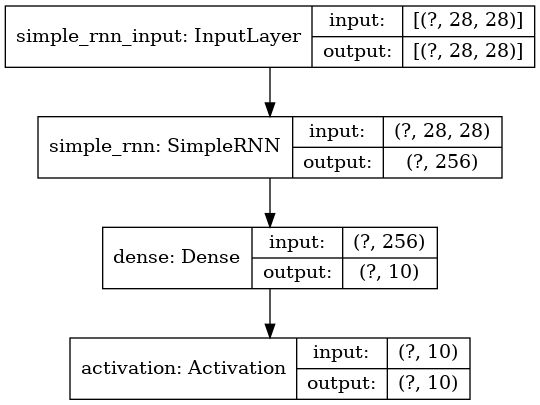

In [19]:
plot_model(model, to_file='rnn-mnist.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='rnn-mnist.png')

## Compile the model

In [20]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## train

In [ ]:
#model.fit(x_train, y_train, epochs=20, batch_size=batch_size)
model.fit(x_train, y_train, epochs=30, batch_size=batch_size)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 21s 348us/sample - loss: 2.1756 - accuracy: 0.1950
Epoch 2/30
60000/60000 [==============================] - 16s 272us/sample - loss: 2.3095 - accuracy: 0.1053
Epoch 3/30
60000/60000 [==============================] - 16s 262us/sample - loss: 2.3046 - accuracy: 0.1113
Epoch 4/30
60000/60000 [==============================] - 15s 256us/sample - loss: 2.1013 - accuracy: 0.2400
Epoch 5/30
60000/60000 [==============================] - 14s 241us/sample - loss: 1.7717 - accuracy: 0.4088
Epoch 6/30
60000/60000 [==============================] - 12s 201us/sample - loss: 1.9093 - accuracy: 0.3461
Epoch 7/30
60000/60000 [==============================] - 12s 207us/sample - loss: 1.8141 - accuracy: 0.3865
Epoch 8/30
60000/60000 [==============================] - 12s 198us/sample - loss: 1.8036 - accuracy: 0.3846
Epoch 9/30
60000/60000 [==============================] - 13s 214us/sample - loss: 1.7923 - accuracy: 0.3

In [28]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 26.3%


In [29]:
import sklearn.metrics as metrics

y_pred_ohe = model.predict(x_test)   
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)  
confusion_matrix

array([[   0,    0,    0,    4,    0,  731,   48,    6,    8,  183],
       [   0,    0,    0,    0,    0, 1059,   12,    0,    0,   64],
       [   0,   11,    0,   13,   49,  452,  302,    0,   39,  166],
       [   0,    0,    0,  145,    1,  659,   38,    1,   39,  127],
       [   0,    0,    0,    0,   41,  142,   25,    0,    0,  774],
       [   0,    3,    0,   49,    7,  466,   76,    2,   33,  256],
       [   0,    0,    0,    0,    2,  115,  828,    0,    0,   13],
       [   0,    0,    0,    2,   11,   39,   34,   89,    7,  846],
       [   0,    0,    0,   25,    5,  526,   20,    1,  138,  259],
       [   0,    0,    0,    0,    0,   78,    0,    0,    9,  922]])

In [30]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

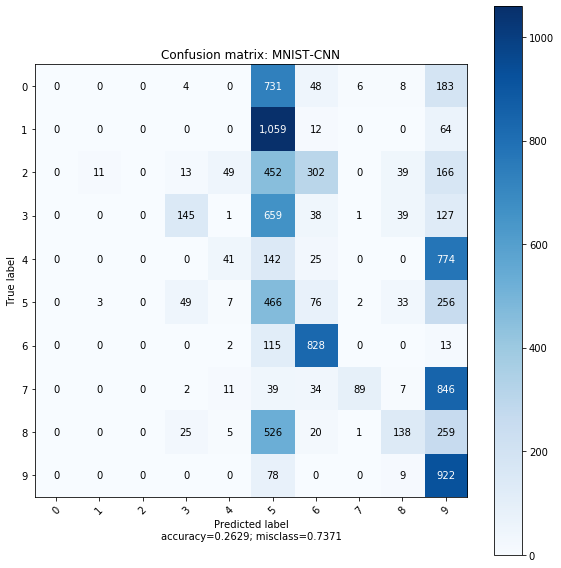

In [31]:
title = 'Confusion matrix: MNIST-CNN'
target_names = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(confusion_matrix, target_names, title=title, cmap=None, normalize=False)